Things to look at:

- Pricing Tier
    - Average transaction volume
    - Difference in monthly volume
- Specific features
    - Average transaction volume
    - Difference in monthly volume

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Data prep

```{python}
path = "~/Repositories/datasets/formfeatures/"

ff_1 = pd.read_csv(path+"form_feature_summary.csv")
ff_2 = pd.read_csv(path+"form_feature_summary_1.csv")
ff_3 = pd.read_csv(path+"form_feature_summary_2.csv")
ff_4 = pd.read_csv(path+"form_feature_summary_3.csv")
ff_5 = pd.read_csv(path+"form_feature_summary_4.csv")
ff_6 = pd.read_csv(path+"form_feature_summary_5.csv")
ff_7 = pd.read_csv(path+"form_feature_summary_6.csv")
ff_8 = pd.read_csv(path+"form_feature_summary_7.csv")
ff_9 = pd.read_csv(path+"form_feature_summary_8.csv")
ff_10 = pd.read_csv(path+"form_feature_summary_9.csv")
ff_11 = pd.read_csv(path+"form_feature_summary_10.csv")
ff_12 = pd.read_csv(path+"form_feature_summary_11.csv")
ff_13 = pd.read_csv(path+"form_feature_summary_12.csv")

df = ff_1.append([ff_2, ff_3, ff_4, ff_5, ff_6, ff_7, ff_8, ff_9, ff_10, ff_11, ff_12, ff_13])

df.gift_assist_active.fillna('0',  inplace=True)
df.dropna(inplace=True)
df.to_csv("~/Repositories/datasets/formfeatures.csv")
```

In [2]:
df = pd.read_csv("~/Repositories/datasets/formfeatures.csv")

In [3]:
df.pricing_tier = df.pricing_tier.astype('category')
df[['pricing_tier', 'trans_vol', 'trans_count', 'recurring_count', 'sms_active', 'gift_assist_active', 'goals_active', 'events_active', 'pledges_active', 'landing_pages_active']].describe()

,trans_vol,trans_count,recurring_count,sms_active,gift_assist_active,goals_active,events_active,pledges_active,landing_pages_active
count,4.445000e+03,4.445000e+03,4.445000e+03,4445.000000,4445.000000,4445.0,4445.0,4445.0,4445.0
mean,2.243213e+07,1.824996e+05,1.824335e+05,0.167829,0.187177,0.0,0.0,1.0,1.0
std,3.934451e+08,3.453099e+06,3.453102e+06,0.373756,0.400346,0.0,0.0,0.0,0.0
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,1.0,1.0
25%,7.260000e+02,9.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,1.0,1.0
50%,7.483550e+03,6.700000e+01,0.000000e+00,0.000000,0.000000,0.0,0.0,1.0,1.0
75%,1.193880e+05,9.570000e+02,7.240000e+02,0.000000,0.000000,0.0,0.0,1.0,1.0
max,1.867780e+10,1.650899e+08,1.650899e+08,1.000000,2.000000,0.0,0.0,1.0,1.0


# Looking at average volume by pricing tier

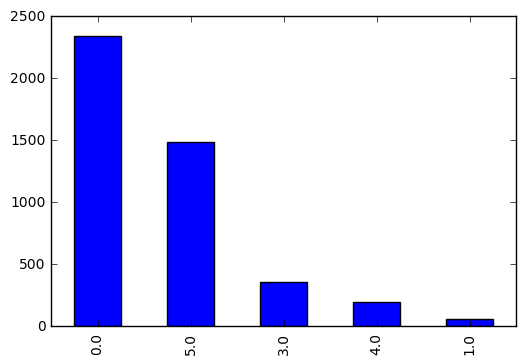

In [4]:
df.pricing_tier.value_counts().plot(kind="bar")

Pricing tier ~ average volume correlation: [ 1783549.27108906]
Pricing Tier Form Counts
pricing_tier
0.0    2342
1.0      63
3.0     358
4.0     193
5.0    1489
Name: form, dtype: int64
Pricing Tier Average Transaction Volumes
pricing_tier
0.0    186.069207
1.0    192.606140
3.0    147.223373
4.0    186.524292
5.0    197.353986
Name: avg_vol, dtype: float64


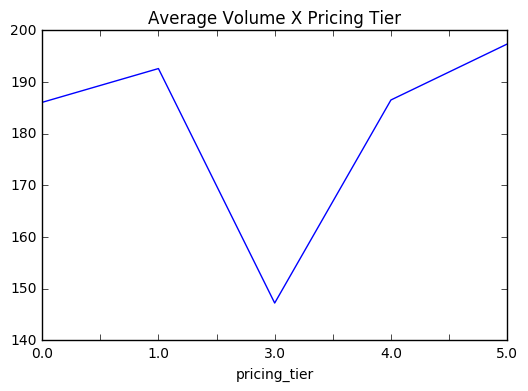

In [5]:
df['avg_vol'] = df.trans_vol / df.trans_count

print("Pricing tier ~ average volume correlation: "+str(np.correlate(df.pricing_tier, df.avg_vol)))

print("Pricing Tier Form Counts")
print(df.groupby('pricing_tier').form.count())

print("Pricing Tier Average Transaction Volumes")
print(df.groupby('pricing_tier').avg_vol.mean())

df.groupby('pricing_tier').avg_vol.mean().plot(title="Average Volume X Pricing Tier")

   Unnamed: 0   org  form pricing_tier    trans_vol  trans_count  \
0           0   6.0   1.0          0.0   1870871.35      15265.0   
1           1  13.0   3.0          0.0   6970275.84      27324.0   
2           2  31.0   9.0          5.0   7459948.50      48518.0   
3           3  33.0  11.0          0.0  13864030.06      79789.0   
4           4  39.0  14.0          0.0  17258138.73      19305.0   

   recurring_count            date_live  sms_active  gift_assist_active  \
0          15265.0  2006-05-18 00:00:00         0.0                 0.0   
1          27324.0  2006-08-22 00:00:00         0.0                 1.0   
2          48518.0  2007-05-18 00:00:00         0.0                 0.0   
3          79789.0  2007-06-12 00:00:00         0.0                 0.0   
4          19305.0  2007-12-07 00:00:00         0.0                 1.0   

   goals_active  events_active  pledges_active  landing_pages_active  \
0           0.0            0.0             1.0                   1.0

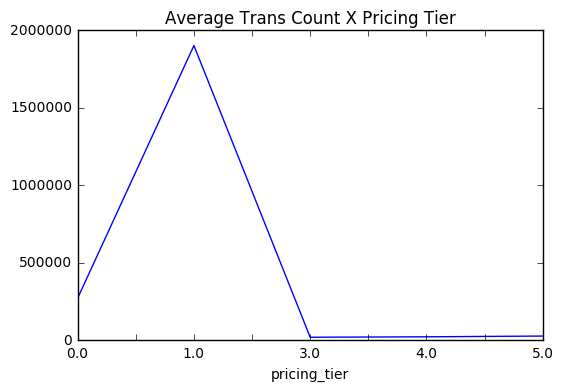

In [6]:
print(df.head())
df.groupby('pricing_tier').trans_count.mean().plot(title="Average Trans Count X Pricing Tier")

Looking at average volumes per feature across all data

In [7]:
for f in ['sms_active', 'gift_assist_active']:
    print(f+" to avg_vol: "+str(np.correlate(df.avg_vol, df[f])))
    avg_vol_active = df[df[f]==1].avg_vol.mean()
    avg_vol_inactive = df[df[f]==0].avg_vol.mean()
    print("\taverage volume changes "+str(avg_vol_active-avg_vol_inactive)+" by when activated")

sms_active to avg_vol: [ 97207.14302603]
	average volume changes -67.9291951002 by when activated
gift_assist_active to avg_vol: [ 142445.14466666]
	average volume changes -19.9579592292 by when activated


In [8]:
df_legacy = df[df.pricing_tier==0]
df_impact = df[df.pricing_tier==1]
df_engage = df[df.pricing_tier==3]
df_grow = df[df.pricing_tier==4]
df_start = df[df.pricing_tier==5]
df_exlegacy = df[df.pricing_tier!=0]
df_ies = df[(df.pricing_tier==1)|(df.pricing_tier==3)|(df.pricing_tier==5)]

Looking at average volume per pricing tier

In [9]:
feature_delta_sms = {}
feature_delta_giftassist = {}
avgs = {}
perc_ga_enabled = {}
perc_sms_enabled = {}
counts = {}

feature_delta_sms['legacy'] = (df_legacy[df_legacy.sms_active==1].avg_vol.mean()-df_legacy[df_legacy.sms_active==0].avg_vol.mean())
feature_delta_giftassist['legacy'] = (df_legacy[df_legacy.gift_assist_active==1].avg_vol.mean()-df_legacy[df_legacy.gift_assist_active==0].avg_vol.mean())
avgs['legacy'] = df_legacy.avg_vol.mean()
perc_ga_enabled['legacy'] = (float(len(df_legacy[df_legacy.gift_assist_active==1])) / float(len(df_legacy))) * 100
perc_sms_enabled['legacy'] = (float(len(df_legacy[df_legacy.sms_active==1])) / float(len(df_legacy))) * 100
counts['legacy'] = len(df_legacy)

feature_delta_sms['impact'] = (df_impact[df_impact.sms_active==1].avg_vol.mean()-df_impact[df_impact.sms_active==0].avg_vol.mean())
feature_delta_giftassist['impact'] = (df_impact[df_impact.gift_assist_active==1].avg_vol.mean()-df_impact[df_impact.gift_assist_active==0].avg_vol.mean())
avgs['impact'] = df_impact.avg_vol.mean()
perc_ga_enabled['impact'] = (float(len(df_impact[df_impact.gift_assist_active==1])) / float(len(df_impact))) * 100
perc_sms_enabled['impact'] = (float(len(df_impact[df_impact.sms_active==1])) / float(len(df_impact))) * 100
counts['impact'] = len(df_impact)

feature_delta_sms['engage'] = (df_engage[df_engage.sms_active==1].avg_vol.mean()-df_engage[df_engage.sms_active==0].avg_vol.mean())
feature_delta_giftassist['engage'] = (df_engage[df_engage.gift_assist_active==1].avg_vol.mean()-df_engage[df_engage.gift_assist_active==0].avg_vol.mean())
avgs['engage'] = df_engage.avg_vol.mean()
perc_ga_enabled['engage'] = (float(len(df_engage[df_engage.gift_assist_active==1])) / float(len(df_engage))) * 100
perc_sms_enabled['engage'] = (float(len(df_engage[df_engage.sms_active==1])) / float(len(df_engage))) * 100
counts['engage'] = len(df_engage)

feature_delta_sms['grow'] = (df_grow[df_grow.sms_active==1].avg_vol.mean()-df_grow[df_grow.sms_active==0].avg_vol.mean())
feature_delta_giftassist['grow'] = (df_grow[df_grow.gift_assist_active==1].avg_vol.mean()-df_grow[df_grow.gift_assist_active==0].avg_vol.mean())
avgs['grow'] = df_grow.avg_vol.mean()
perc_ga_enabled['grow'] = (float(len(df_grow[df_grow.gift_assist_active==1])) / float(len(df_grow))) * 100
perc_sms_enabled['grow'] = (float(len(df_grow[df_grow.sms_active==1])) / float(len(df_grow))) * 100
counts['grow'] = len(df_grow)

feature_delta_sms['start'] = (df_start[df_start.sms_active==1].avg_vol.mean()-df_start[df_start.sms_active==0].avg_vol.mean())
feature_delta_giftassist['start'] = (df_start[df_start.gift_assist_active==1].avg_vol.mean()-df_start[df_start.gift_assist_active==0].avg_vol.mean())
avgs['start'] = df_start.avg_vol.mean()
perc_ga_enabled['start'] = (float(len(df_start[df_start.gift_assist_active==1])) / float(len(df_start))) * 100
perc_sms_enabled['start'] = (float(len(df_start[df_start.sms_active==1])) / float(len(df_start))) * 100
counts['start'] = len(df_start)

feature_delta_sms['all'] = (df[df.sms_active==1].avg_vol.mean()-df[df.sms_active==0].avg_vol.mean())
feature_delta_giftassist['all'] = (df[df.gift_assist_active==1].avg_vol.mean()-df[df.gift_assist_active==0].avg_vol.mean())
avgs['all'] = df.avg_vol.mean()
perc_ga_enabled['all'] = (float(len(df[df.gift_assist_active==1])) / float(len(df))) * 100
perc_sms_enabled['all'] = (float(len(df[df.sms_active==1])) / float(len(df))) * 100
counts['all'] = len(df)

feature_delta_sms['allxleg'] = (df_exlegacy[df_exlegacy.sms_active==1].avg_vol.mean()-df_exlegacy[df_exlegacy.sms_active==0].avg_vol.mean())
feature_delta_giftassist['allxleg'] = (df_exlegacy[df_exlegacy.gift_assist_active==1].avg_vol.mean()-df_exlegacy[df_exlegacy.gift_assist_active==0].avg_vol.mean())
avgs['allxleg'] = df_exlegacy.avg_vol.mean()
perc_ga_enabled['allxleg'] = (float(len(df_exlegacy[df_exlegacy.gift_assist_active==1])) / float(len(df_exlegacy))) * 100
perc_sms_enabled['allxleg'] = (float(len(df_exlegacy[df_exlegacy.sms_active==1])) / float(len(df_exlegacy))) * 100
counts['allxleg'] = len(df_exlegacy)

feature_delta_sms['ies'] = (df_ies[df_ies.sms_active==1].avg_vol.mean()-df_ies[df_ies.sms_active==0].avg_vol.mean())
feature_delta_giftassist['ies'] = (df_ies[df_ies.gift_assist_active==1].avg_vol.mean()-df_ies[df_ies.gift_assist_active==0].avg_vol.mean())
avgs['ies'] = df_ies.avg_vol.mean()
perc_ga_enabled['ies'] = (float(len(df_ies[df_ies.gift_assist_active==1])) / float(len(df_ies))) * 100
perc_sms_enabled['ies'] = (float(len(df_ies[df_ies.sms_active==1])) / float(len(df_ies))) * 100
counts['ies'] = len(df_ies)


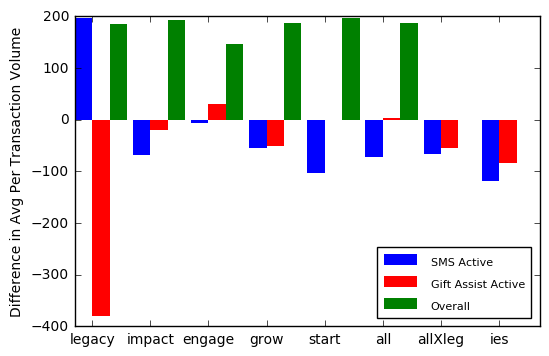

In [14]:
width=0.3
indx = [0, 1, 2, 3, 4, 5, 6, 7]
indx2 = [0.3, 1.3, 2.3, 3.3, 4.3, 5.3, 6.3, 7.3]
indx3 = [0.6, 1.6, 2.6, 3.6, 4.6, 5.6, 6.6, 7.6]
indx3_short = [0.6, 1.6, 2.6, 3.6, 4.6, 5.6]

fig, ax = plt.subplots()

rects1 = ax.bar(indx, feature_delta_sms.values(), width, color="b", edgecolor="none")
rects2 = ax.bar(indx2, feature_delta_giftassist.values(), width, color="r", edgecolor="none")

overall_avgs = df.groupby('pricing_tier').avg_vol.mean().tolist()
overall_avgs.append(df.avg_vol.mean())
rects3 = ax.bar(indx3_short, overall_avgs, width, color="g", edgecolor="none")

ax.set_xticks(indx2)
ax.set_xticklabels(('legacy', 'impact', 'engage', 'grow', 'start', 'all', 'allXleg', 'ies'))
ax.set_ylabel('Difference in Avg Per Transaction Volume')
legend = ax.legend((rects1[0], rects2[0], rects3[0]), ('SMS Active', 'Gift Assist Active', 'Overall'), loc='lower right')
plt.setp(legend.get_texts(),fontsize='8')

plt.show()

In [15]:
keys = ["legacy", "start", "grow", "engage", "impact", "all", "allxleg", "ies"]

print "| {:8s} | {:16s} | {:16s} | {:16s} | {:16s} | {:16s} | {:10s} |".format("Tier", "Diff SMS Enabled", "Diff GA Enabled", "Avg Trans Value", "Perc SMS Enabled", "Perc GA Enabled", "Count")
print("-------------------------------------------------------------------------------------------------------------------")
for i in range(0, len(keys)):
    k = keys[i]
    pre_k = keys[i-1]
    print '| {:8s} | {:16.2f} | {:16.2f} | {:16.2f} | {:15.2f}% | {:15.2f}% | {:5n} |'.format(k, feature_delta_sms[k], feature_delta_giftassist[k], avgs[k], perc_sms_enabled[k], perc_ga_enabled[k], counts[k])

| Tier     | Diff SMS Enabled | Diff GA Enabled  | Avg Trans Value  | Perc SMS Enabled | Perc GA Enabled  | Count      |
-------------------------------------------------------------------------------------------------------------------
| legacy   |           -72.09 |             3.87 |           186.07 |           24.21% |           20.67% |  2342 |
| start    |          -103.41 |              nan |           197.35 |            1.95% |            0.00% |  1489 |
| grow     |          -118.19 |           -84.47 |           186.52 |           37.82% |           40.93% |   193 |
| engage   |            -6.59 |            29.65 |           147.22 |           20.67% |           53.63% |   358 |
| impact   |           197.77 |          -380.60 |           192.61 |            4.76% |           65.08% |    63 |
| all      |           -67.93 |           -19.96 |           186.83 |           16.78% |           17.91% |  4445 |
| allxleg  |           -66.62 |           -54.20 |           187.68

In [16]:
print(feature_delta_giftassist)

{'impact': -380.6039676673378, 'all': -19.95795922920209, 'engage': 29.651939481754795, 'ies': -50.77419543284867, 'start': nan, 'legacy': 3.8657559714286265, 'allxleg': -54.199052608564614, 'grow': -84.46922442275928}


In [17]:
# excluding legacy & all
print(feature_delta_giftassist.values()[1:-1])

T = [feature_delta_giftassist.values()[i] for i in [1,2,4]]

AT = [d.avg_vol.mean() for d in [df_impact, df_engage, df_start]]
mn_trans_vol = np.mean(AT)

print("Overall difference in transaction volume for activating gift assist: "+str(np.mean(T))+", "+str((np.mean(T)/mn_trans_vol)*100)+"%")

[-19.95795922920209, 29.651939481754795, -50.77419543284867, nan, 3.8657559714286265, -54.199052608564614]
Overall difference in transaction volume for activating gift assist: nan, nan%


## _Conclusion_: the only feature that stands out as a strong influence is gift assist. Activating gift assist appears to provide a $4.52, 2.5% increase to the average transaction value when outliers are elliminated. However I don't have the data to determine how many transactions applied the gift assist addition or to determine any effect, if any exists, to conversion.

```{mysql}
select T.org, O.tier, DATE_FORMAT(T.tm_stamp, '%m-%Y') AS date, SUM(T.amount) as sum, COUNT(T.id) as count from Transaction as T left join Organization as O on T.org=O.id where YEAR(T.tm_stamp) = '2017' group by T.org, DATE_FORMAT(T.tm_stamp, '%m-%Y') order by O.id limit 1000 offset 0;
```
```
mysql coolname -u jeremy -p -h ndb1 < trans.sql > trans_monthly.csv
```

# Looking at monthly averages by payment tier

Looking at just transactions for 2017

In [18]:
df_mt = pd.read_csv("/Users/vsquared/Repositories/datasets/monthly_transactions/trans_monthly_1.csv", sep="\t")
df_mt = df_mt.append(pd.read_csv("/Users/vsquared/Repositories/datasets/monthly_transactions/trans_monthly_2.csv", sep="\t"))
df_mt.to_csv("/Users/vsquared/Repositories/datasets/monthly_transactions/trans_monthly.csv")

In [19]:
monthly_trans = pd.read_csv("~/Repositories/datasets/monthly_transactions/trans_monthly.csv")
monthly_trans['avg_trans_vol'] = monthly_trans['sum'] / monthly_trans['count']
monthly_trans.columns

Index([u'Unnamed: 0', u'org', u'tier', u'date', u'sum', u'count',
       u'avg_trans_vol'],
      dtype='object')

## Looking at average funds raised, transaction value, transaction counts

In [20]:
sums = {}
sums['all'] = monthly_trans['sum'].mean()
sums['legacy'] = monthly_trans[monthly_trans.tier==0]['sum'].mean()
sums['impact'] = monthly_trans[monthly_trans.tier==1]['sum'].mean()
sums['engage'] = monthly_trans[monthly_trans.tier==3]['sum'].mean()
sums['grow'] = monthly_trans[monthly_trans.tier==4]['sum'].mean()
sums['start'] = monthly_trans[monthly_trans.tier==5]['sum'].mean()

avgs = {}
avgs['all'] = monthly_trans['avg_trans_vol'].mean()
avgs['legacy'] = monthly_trans[monthly_trans.tier==0]['avg_trans_vol'].mean()
avgs['impact'] = monthly_trans[monthly_trans.tier==1]['avg_trans_vol'].mean()
avgs['engage'] = monthly_trans[monthly_trans.tier==3]['avg_trans_vol'].mean()
avgs['grow'] = monthly_trans[monthly_trans.tier==4]['avg_trans_vol'].mean()
avgs['start'] = monthly_trans[monthly_trans.tier==5]['avg_trans_vol'].mean()

counts = {}
counts['all'] = len(monthly_trans)
counts['legacy'] = len(monthly_trans[monthly_trans.tier==0])
counts['impact'] = len(monthly_trans[monthly_trans.tier==1])
counts['engage'] = len(monthly_trans[monthly_trans.tier==3])
counts['grow'] = len(monthly_trans[monthly_trans.tier==4])
counts['start'] = len(monthly_trans[monthly_trans.tier==5])

avg_trans_per_form = {}
avg_trans_per_form['all'] = monthly_trans['count'].mean()
avg_trans_per_form['legacy'] = monthly_trans[monthly_trans.tier==0]['count'].mean()
avg_trans_per_form['impact'] = monthly_trans[monthly_trans.tier==1]['count'].mean()
avg_trans_per_form['engage'] = monthly_trans[monthly_trans.tier==3]['count'].mean()
avg_trans_per_form['grow'] = monthly_trans[monthly_trans.tier==4]['count'].mean()
avg_trans_per_form['start'] = monthly_trans[monthly_trans.tier==5]['count'].mean()


| Tier     | Avg Monthly Sum  | Avg Trans Value  | Avg Trans per Org | Organizations    |
------------------------------------------------------------------------------------------
| legacy   |    8051.76 (129.90%) |     176.46 (100.46%) |      61.09 (118.73%) |       2953 |
| start    |    3054.83 (37.94%) |     184.77 (104.71%) |      21.87 (35.80%) |       2677 |
| grow     |    6540.10 (214.09%) |     132.34 (71.63%) |      57.95 (264.95%) |        319 |
| engage   |   12039.20 (184.08%) |     128.86 (97.37%) |     167.56 (289.12%) |        250 |
| impact   |   97670.57 (811.27%) |      89.85 (69.73%) |    1359.13 (811.15%) |         15 |
| all      |    6198.23 (6.35%) |     175.65 (195.49%) |      51.45 (3.79%) |       6214 |


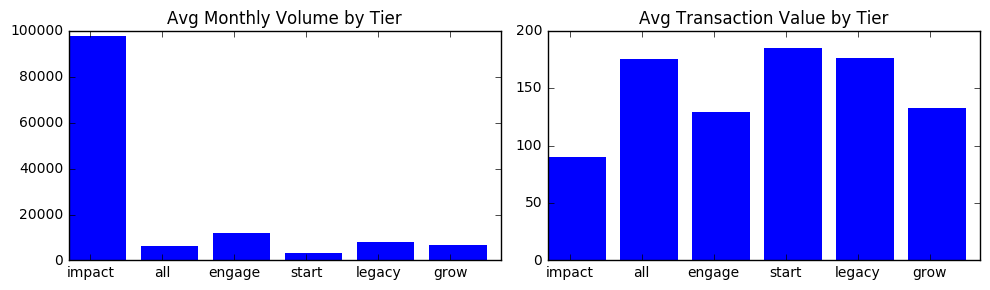

In [21]:
keys = ["legacy", "start", "grow", "engage", "impact", "all"]

print "| {:8s} | {:16s} | {:16s} | {:16s} | {:16s} |".format("Tier", "Avg Monthly Sum", "Avg Trans Value", "Avg Trans per Org", "Organizations")
print("------------------------------------------------------------------------------------------")
for i in range(0, len(keys)):
    k = keys[i]
    pre_k = keys[i-1]
    print '| {:8s} | {:10.2f} ({:4.2f}%) | {:10.2f} ({:.2f}%) | {:10.2f} ({:.2f}%) | {:10n} |'.format(k, sums[k], (sums[k]/sums[pre_k])*100, avgs[k], (avgs[k]/avgs[pre_k])*100, avg_trans_per_form[k], (avg_trans_per_form[k]/avg_trans_per_form[pre_k])*100, counts[k])

indx = [0, 1, 2, 3, 4, 5]
indx2 = [0.3, 1.3, 2.3, 3.3, 4.3, 5.3]

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10, 3)

rects1 = ax1.bar(indx, sums.values(), color="b", edgecolor="none")
ax1.set_xticks(indx2)
ax1.set_xticklabels(('impact', 'all', 'engage', 'start', 'legacy', 'grow'))
ax1.set_title("Avg Monthly Volume by Tier")

rects2 = ax2.bar(indx, avgs.values(), color="b", edgecolor="none")
ax2.set_xticks(indx2)
ax2.set_xticklabels(('impact', 'all', 'engage', 'start', 'legacy', 'grow'))
ax2.set_title("Avg Transaction Value by Tier")

plt.tight_layout()
plt.show()

## Checking chronological monthly averages by payment tier

In [22]:
months = {}
months['legacy'] = monthly_trans[monthly_trans.tier==0].groupby('date')['sum'].mean()
months['impact'] = monthly_trans[monthly_trans.tier==1].groupby('date')['sum'].mean()
months['engage'] = monthly_trans[monthly_trans.tier==3].groupby('date')['sum'].mean()
months['grow'] = monthly_trans[monthly_trans.tier==4].groupby('date')['sum'].mean()
months['start'] = monthly_trans[monthly_trans.tier==5].groupby('date')['sum'].mean()

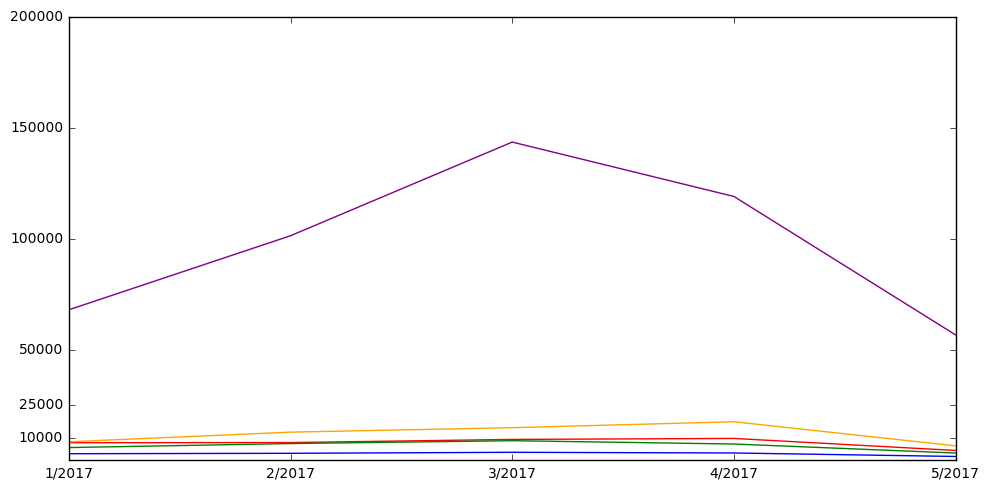

In [23]:
indx = [0, 1, 2, 3, 4]

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ln1 = plt.plot(indx, months['legacy'], color="red")
ln2 = plt.plot(indx, months['start'], color="blue")
ln3 = plt.plot(indx, months['grow'], color="green")
ln4 = plt.plot(indx, months['engage'], color="orange")
ln5 = plt.plot(indx, months['impact'], color="purple")

ax.set_xticks(indx)
ax.set_xticklabels(('1/2017', '2/2017', '3/2017', '4/2017', '5/2017'))
ax.set_ylim([0, 200000])
ax.set_yticks([10000, 25000, 50000, 100000, 150000, 200000])
plt.tight_layout()
plt.show()

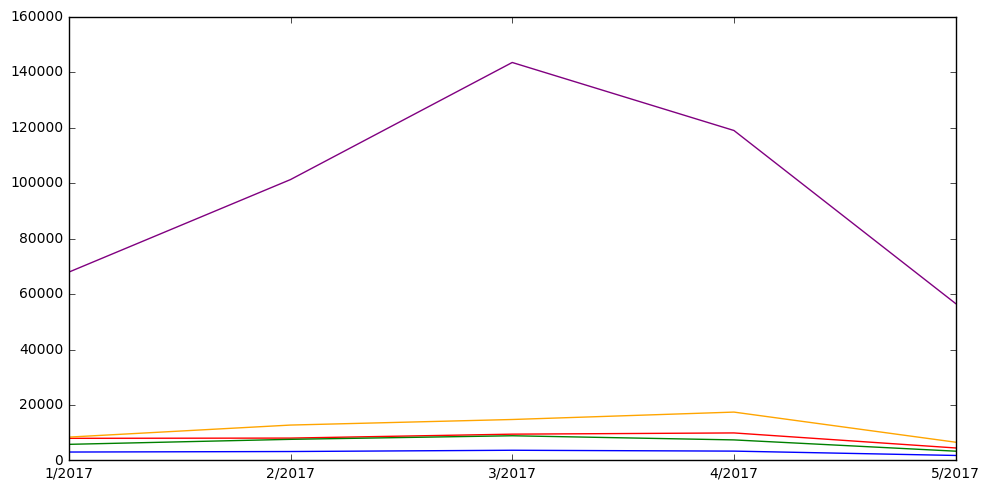

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ln1 = plt.plot(indx, months['legacy'], color="red")
ln2 = plt.plot(indx, months['start'], color="blue")
ln3 = plt.plot(indx, months['grow'], color="green")
ln4 = plt.plot(indx, months['engage'], color="orange")
ln5 = plt.plot(indx, months['impact'], color="purple")

ax.set_xticks(indx)
ax.set_xticklabels(('1/2017', '2/2017', '3/2017', '4/2017', '5/2017'))
plt.tight_layout()
plt.show()

In [25]:
keys = ["legacy", "start", "grow", "engage", "impact"]

print "| {:6s} | {:16s} | {:16s} | {:16s} | {:16s} | {:16s} |".format("Tier", "Jan 2017", "Feb 2017", "Mar 2017", "Apr 2017", "May 2017")
print("---------------------------------------------------------------------------------------------------------")
for i in range(0, len(keys)):
    print '| {:6s} | {:8.2f} ({:.2f}%) | {:8.2f} ({:.2f}%) | {:8.2f} ({:.2f}%) | {:8.2f} ({:.2f}%) | {:8.2f} ({:.2f}%) |'.format(keys[i], months[keys[i]][0], (months[keys[i]][0]/months[keys[i-1]][0])*100, months[keys[i]][1], (months[keys[i]][1]/months[keys[i-1]][1])*100, months[keys[i]][2], (months[keys[i]][2]/months[keys[i-1]][2])*100, months[keys[i]][3], (months[keys[i]][3]/months[keys[i-1]][3])*100, months[keys[i]][4], (months[keys[i]][4]/months[keys[i-1]][4])*100)


| Tier   | Jan 2017         | Feb 2017         | Mar 2017         | Apr 2017         | May 2017         |
---------------------------------------------------------------------------------------------------------
| legacy |  7980.07 (11.75%) |  8062.56 (7.96%) |  9479.83 (6.60%) |  9922.15 (8.34%) |  4501.04 (7.95%) |
| start  |  3033.04 (38.01%) |  3217.99 (39.91%) |  3674.19 (38.76%) |  3364.03 (33.90%) |  1796.87 (39.92%) |
| grow   |  5806.59 (191.44%) |  7613.56 (236.59%) |  8904.28 (242.35%) |  7408.51 (220.23%) |  3341.51 (185.96%) |
| engage |  8416.74 (144.95%) | 12761.26 (167.61%) | 14768.24 (165.86%) | 17440.06 (235.41%) |  6575.99 (196.80%) |
| impact | 67921.55 (806.98%) | 101306.43 (793.86%) | 143535.78 (971.92%) | 119006.50 (682.37%) | 56582.61 (860.44%) |


In [36]:
months = {}
months['legacy'] = monthly_trans[monthly_trans.tier==0].groupby('date')['count'].mean()
months['impact'] = monthly_trans[monthly_trans.tier==1].groupby('date')['count'].mean()
months['engage'] = monthly_trans[monthly_trans.tier==3].groupby('date')['count'].mean()
months['grow'] = monthly_trans[monthly_trans.tier==4].groupby('date')['count'].mean()
months['start'] = monthly_trans[monthly_trans.tier==5].groupby('date')['count'].mean()

std = {}
std['legacy'] = monthly_trans[monthly_trans.tier==0].groupby('date')['count'].std()
std['impact'] = monthly_trans[monthly_trans.tier==1].groupby('date')['count'].std()
std['engage'] = monthly_trans[monthly_trans.tier==3].groupby('date')['count'].std()
std['grow'] = monthly_trans[monthly_trans.tier==4].groupby('date')['count'].std()
std['start'] = monthly_trans[monthly_trans.tier==5].groupby('date')['count'].std()

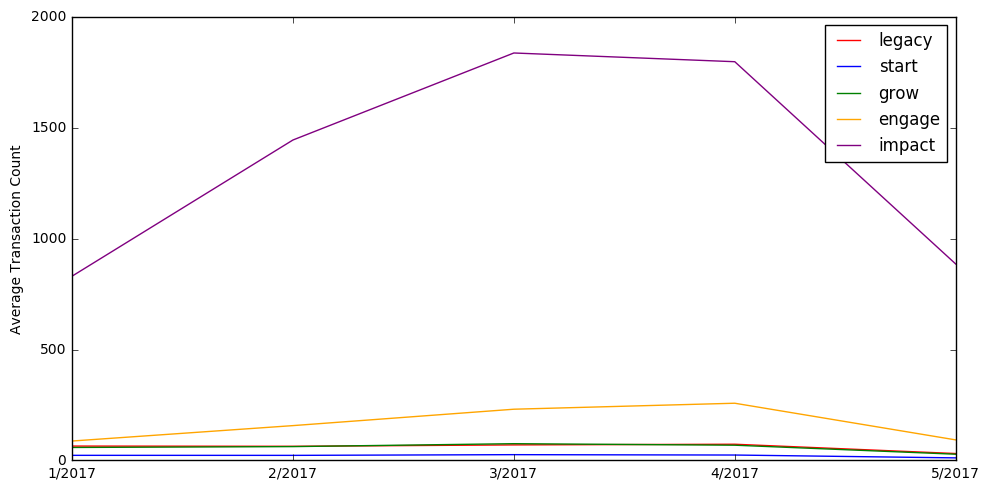

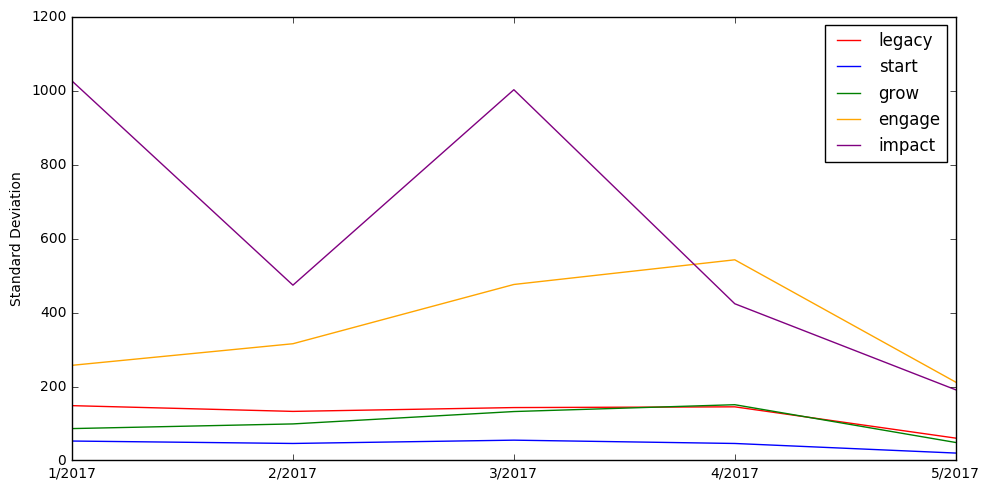

In [37]:
indx = [0, 1, 2, 3, 4]

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ln1 = plt.plot(indx, months['legacy'], color="red")
ln2 = plt.plot(indx, months['start'], color="blue")
ln3 = plt.plot(indx, months['grow'], color="green")
ln4 = plt.plot(indx, months['engage'], color="orange")
ln5 = plt.plot(indx, months['impact'], color="purple")

ax.set_xticks(indx)
ax.set_xticklabels(('1/2017', '2/2017', '3/2017', '4/2017', '5/2017'))
#ax.set_ylim([0, 200000])
#ax.set_yticks([10000, 25000, 50000, 100000, 150000, 200000])
ax.legend(loc="upper right", labels=['legacy', 'start', 'grow', 'engage', 'impact'])
plt.ylabel("Average Transaction Count")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ln1 = plt.plot(indx, std['legacy'], color="red")
ln2 = plt.plot(indx, std['start'], color="blue")
ln3 = plt.plot(indx, std['grow'], color="green")
ln4 = plt.plot(indx, std['engage'], color="orange")
ln5 = plt.plot(indx, std['impact'], color="purple")

ax.set_xticks(indx)
ax.set_xticklabels(('1/2017', '2/2017', '3/2017', '4/2017', '5/2017'))
#ax.set_ylim([0, 200000])
#ax.set_yticks([10000, 25000, 50000, 100000, 150000, 200000])
ax.legend(loc="upper right", labels=['legacy', 'start', 'grow', 'engage', 'impact'])
plt.ylabel("Standard Deviation")
plt.tight_layout()
plt.show()

# Looking at transaction counts by features across time

In [28]:
df.columns

Index([u'Unnamed: 0', u'org', u'form', u'pricing_tier', u'trans_vol',
       u'trans_count', u'recurring_count', u'date_live', u'sms_active',
       u'gift_assist_active', u'goals_active', u'events_active',
       u'pledges_active', u'landing_pages_active', u'avg_vol'],
      dtype='object')

In [29]:
mt_features = monthly_trans.join(df[['org', 'sms_active', 'gift_assist_active', 'goals_active', 'events_active', 'pledges_active']], 
                   on="org", lsuffix="_l")[['tier', 'date', 'sum', 'count', 'avg_trans_vol', 'org', 'sms_active', 
                                           'gift_assist_active', 'goals_active', 'events_active', 'pledges_active']]

In [30]:

mt_features.head(10)

,tier,date,sum,count,avg_trans_vol,org,sms_active,gift_assist_active,goals_active,events_active,pledges_active
0,0,01-2017,3320.50,39,85.141026,41.0,0.0,0.0,0.0,0.0,1.0
1,0,05-2017,38874.00,134,290.104478,41.0,0.0,0.0,0.0,0.0,1.0
2,0,03-2017,6605.85,52,127.035577,41.0,0.0,0.0,0.0,0.0,1.0
3,0,02-2017,3585.76,33,108.659394,41.0,0.0,0.0,0.0,0.0,1.0
4,0,04-2017,10468.25,56,186.933036,41.0,0.0,0.0,0.0,0.0,1.0
5,0,04-2017,13.00,5,2.600000,50.0,0.0,0.0,0.0,0.0,1.0
6,0,02-2017,8883.65,84,105.757738,62.0,1.0,0.0,0.0,0.0,1.0
7,0,01-2017,13816.90,127,108.794488,62.0,1.0,0.0,0.0,0.0,1.0
8,0,05-2017,1594.60,10,159.460000,62.0,1.0,0.0,0.0,0.0,1.0
9,0,04-2017,5080.60,29,175.193103,62.0,1.0,0.0,0.0,0.0,1.0


In [31]:
months = {}
months['sms_active'] = mt_features[mt_features.sms_active==1.0].groupby('date')['count'].mean()
months['sms_inactive'] = mt_features[mt_features.sms_active==0].groupby('date')['count'].mean()
months['gift_assist_active'] = mt_features[mt_features.gift_assist_active==1.0].groupby('date')['count'].mean()
months['gift_assist_inactive'] = mt_features[mt_features.gift_assist_active==0].groupby('date')['count'].mean()
months['goals_active'] = mt_features[mt_features.goals_active==1.0].groupby('date')['count'].mean()
months['goals_inactive'] = mt_features[mt_features.goals_active==0].groupby('date')['count'].mean()
months['events_active'] = mt_features[mt_features.events_active==1.0].groupby('date')['count'].mean()
months['events_inactive'] = mt_features[mt_features.events_active==0].groupby('date')['count'].mean()
months['pledges_active'] = mt_features[mt_features.pledges_active==1.0].groupby('date')['count'].mean()
months['pledges_inactive'] = mt_features[mt_features.pledges_active==0].groupby('date')['count'].mean()

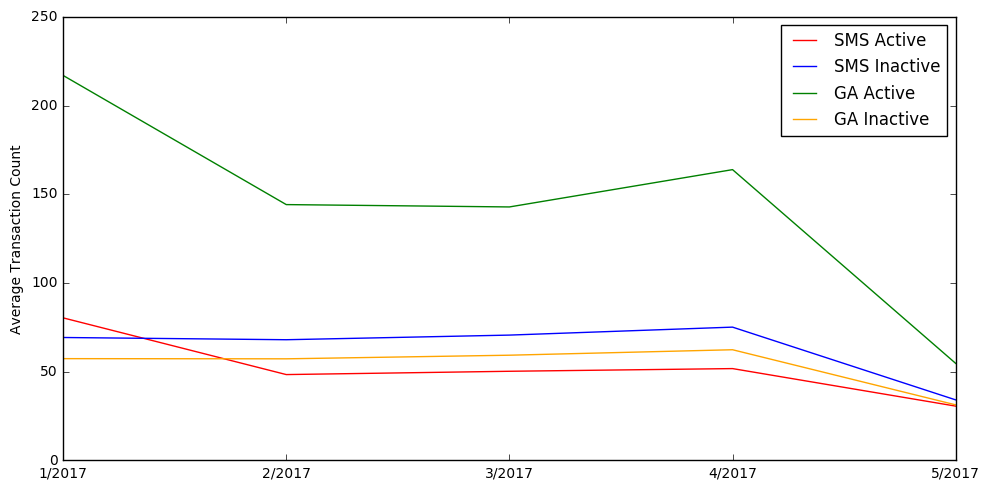

In [34]:
indx = [0, 1, 2, 3, 4]

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ln1 = plt.plot(indx, months['sms_active'], color="red")
ln2 = plt.plot(indx, months['sms_inactive'], color="blue")
ln3 = plt.plot(indx, months['gift_assist_active'], color="green")
ln4 = plt.plot(indx, months['gift_assist_inactive'], color="orange")

ax.set_xticks(indx)
ax.set_xticklabels(('1/2017', '2/2017', '3/2017', '4/2017', '5/2017'))
ax.legend(loc="upper right", labels=['SMS Active', 'SMS Inactive', 'GA Active', 'GA Inactive'])
plt.ylabel("Average Transaction Count")
plt.tight_layout()
plt.show()

it's pretty clear here that sms_active can be negatively associated with transaction counts whereas gift assist is positively associated with transaction counts. behaviorally, i would expect this to be the opposite and i highly doubt this is evidence of any real causation.

In [33]:
mt_features.corr()

,tier,sum,count,avg_trans_vol,org,sms_active,gift_assist_active,goals_active,events_active,pledges_active
tier,1.000000,-0.128894,-0.125823,0.003334,0.016396,0.020816,-0.044284,NaN,NaN,NaN
sum,-0.128894,1.000000,0.755613,0.107459,0.020883,-0.057191,0.051899,NaN,NaN,NaN
count,-0.125823,0.755613,1.000000,-0.031195,0.048515,-0.026658,0.139848,NaN,NaN,NaN
avg_trans_vol,0.003334,0.107459,-0.031195,1.000000,-0.009921,-0.039247,-0.014375,NaN,NaN,NaN
org,0.016396,0.020883,0.048515,-0.009921,1.000000,0.117809,0.107283,NaN,NaN,NaN
sms_active,0.020816,-0.057191,-0.026658,-0.039247,0.117809,1.000000,0.083312,NaN,NaN,NaN
gift_assist_active,-0.044284,0.051899,0.139848,-0.014375,0.107283,0.083312,1.000000,NaN,NaN,NaN
goals_active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
events_active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pledges_active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
